In [1]:
import Assignment2.df_filter_nvida as df_filter_nvida

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from umap import UMAP
from hdbscan import HDBSCAN
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"


from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, BaseRepresentation
from bertopic.vectorizers import ClassTfidfTransformer
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mehdigreefhorst/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
news_articles_data = pd.read_csv("../data/us_equities_news_dataset.csv")
stock_data = pd.read_csv("../data/NVDA.csv")
nvida_news_articles_df = df_filter_nvida.filter_df_to_nvida(df=news_articles_data,
                                                            related_tickers="NVDA")
df_news = df_filter_nvida.add_nvidia_increase_decrease_bool_to_df(df_news=nvida_news_articles_df,
                                                                  df_stock_data=stock_data)
df_news = df_news.drop_duplicates(subset='content', keep='first').reset_index(drop=True)
df_news

nan
nan
nan
nan
nan
nan
nan
nan


,id,ticker,ticker_NVDA_improved,title,title_NVIDIA_topic,category,content,content_NVIDIA_topic,release_date,provider,url,article_id,NVIDIA_stock_increase
0,221539,NIO,True,A Central Bank War Just Started And Its Good F...,False,opinion,ECB Effects\nThe move in the euro was huge fa...,True,2019-03-07,Michael Kramer,https://www.investing.com/analysis/a-central-b...,200395687,0
1,221547,NIO,True,6 Stocks To Watch Nivida Could Be Falling,False,opinion,6 Stocks To Watch March 6 Trading Session\nSt...,True,2019-03-06,Michael Kramer,https://www.investing.com/analysis/6-stocks-to...,200394931,0
2,221572,NIO,True,Stocks Dow Drops Nearly 400 Points as Apple ...,False,news,Investing com A rout in Apple and Facebook ...,True,2018-11-19,Investing.com,https://www.investing.com/news/stock-market-ne...,1694042,0
3,221593,UBER,True,The Zacks Analyst Blog Highlights Advanced Mi...,True,opinion,For Immediate ReleaseChicago IL January 13 ...,True,2020-01-12,Zacks Investment Research,https://www.investing.com/analysis/the-zacks-a...,200498277,0
4,221597,UBER,True,The Best Of CES 2020 Revised,False,opinion,With 4 500 companies bringing their innovation...,True,2020-01-16,Zacks Investment Research,https://www.investing.com/analysis/the-best-of...,200499164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3436,442657,AMD,True,Here s Why Nvidia NVDA Stock Is Gaining Today,True,opinion,Shares of Nvidia NASDAQ NVDA are up nearly...,True,2016-09-27,Zacks Investment Research,https://www.investing.com/analysis/here's-why-...,200155860,1
3437,442682,AMD,True,4 Stocks To Watch Today ATW CWEI MXL SLCA,False,opinion,It was a pretty good start to the week on Mond...,True,2016-05-17,Harry Boxer,"https://www.investing.com/analysis/atw,-cwei,-...",200130262,1
3438,442705,AMD,True,Here s What The Buy Side Expects From AMD Thur...,False,opinion,Advanced Micro Devices Inc NYSE AMD is set ...,True,2014-04-17,Estimize,https://www.investing.com/analysis/here’s-what...,209915,1
3439,442984,T,True,Zacks com Featured Highlights AT T Nu Skin E...,True,opinion,For Immediate Release\n\nChicago IL July 22...,True,2016-07-21,Zacks Investment Research,https://www.investing.com/analysis/zacks.com-f...,200143537,0


In [10]:
def get_standard_bertopic(model_setting_index=0, customer_model_settings = None):
    """
    each of the steps in bertopic are assigned using the model settings, in the future this can be replaced with a grid search system to evaluate different model settings, but this is the most basic version with standard parameters. each of the model settings is in a list
    :param model_setting_index: defines which of the hyperparamter settings to pick
    :return: 
    """
    model_settings = [{
        "language": "english",
        "nr_topics": None,
        "document_embedding": SentenceTransformer("all-MiniLM-L6-v2"),
        "reduce_dimensionality": UMAP(),
        "clustering": HDBSCAN(),
        "topic_tokenization": CountVectorizer(stop_words="english"),
        "topic_representation": ClassTfidfTransformer(),
        "representation_model": KeyBERTInspired()
    },
    {
        "language": "english",
        "nr_topics": 25,
        "document_embedding": SentenceTransformer("all-MiniLM-L6-v2"),
        "reduce_dimensionality": UMAP(),
        "clustering": HDBSCAN(),
        "topic_tokenization": CountVectorizer(stop_words="english"),
        "topic_representation": ClassTfidfTransformer(),
        "representation_model": KeyBERTInspired()
    },
    {
        "language": "english",
        "nr_topics": 25,
        "document_embedding": SentenceTransformer("all-MiniLM-L6-v2"),
        "reduce_dimensionality": UMAP(),
        "clustering": HDBSCAN(min_cluster_size=15),
        "topic_tokenization": CountVectorizer(stop_words="english"),
        "topic_representation": ClassTfidfTransformer(),
        "representation_model": KeyBERTInspired()
    },
    {
        "language": "english",
        "nr_topics": "auto",
        "document_embedding": SentenceTransformer("all-MiniLM-L6-v2"),
        "reduce_dimensionality": UMAP(min_dist=0.05, spread=0.5),
        "clustering": HDBSCAN(min_cluster_size=15),
        "topic_tokenization": CountVectorizer(stop_words="english"),
        "topic_representation": ClassTfidfTransformer(),
        "representation_model": KeyBERTInspired()
    }
    ]
    
    if customer_model_settings is not None:
        for key in model_settings[0].keys():
            if key not in customer_model_settings.keys():
                raise Exception(f"Missing key: {key}")
            
            
    # Step 1 - Extract embeddings
    embedding_model = model_settings[model_setting_index]["document_embedding"]
    
    # Step 2 - Reduce dimensionality
    umap_model = model_settings[model_setting_index]["reduce_dimensionality"]

    # Step 3 - Cluster reduced embeddings
    hdbscan_model = model_settings[model_setting_index]["clustering"]

    # Step 4 - Tokenize topics
    vectorizer_model = model_settings[model_setting_index]["topic_tokenization"]

    # Step 5 - Create topic representation
    ctfidf_model = model_settings[model_setting_index]["topic_representation"]

    # Step 6 - (Optional) Fine-tune topic representations with
    # a `bertopic.representation` model
    representation_model = model_settings[model_setting_index]["representation_model"]
    
    language = model_settings[model_setting_index]["language"]

    # All steps together
    topic_model = BERTopic(
        language=language,
        nr_topics=model_settings[model_setting_index]["nr_topics"],
        embedding_model=embedding_model,          # Step 1 - Extract embeddings
        umap_model=umap_model,                    # Step 2 - Reduce dimensionality
        hdbscan_model=hdbscan_model,              # Step 3 - Cluster reduced embeddings
        vectorizer_model=vectorizer_model,        # Step 4 - Tokenize topics
        ctfidf_model=ctfidf_model,                # Step 5 - Extract topic words
        representation_model=representation_model # Step 6 - (Optional) Fine-tune topic represenations
    )
    return topic_model

def train_bertopic_model(documents, model_setting_index=0, customer_model_settings = None):
    """
    trains the bertopic model from the documents that are given as a parameter
    :param documents: an array of documents to get topics made of
    :param model_setting_index: specifies which batch of hyperparameters to pick that define bertopic. Standard = 0
    :return: 
    """
    topic_model = get_standard_bertopic(model_setting_index=model_setting_index, 
                                        customer_model_settings=customer_model_settings)
    topics, props = topic_model.fit_transform(documents)
    return topic_model, topics, props
    
def get_topics_that_relate_to_nvidia(topic_model):
    """
    this function finds the topics that relate most to the input words given which is NVIDIA
    :param topic_model: 
    :return: 
    """
    similar_topics, similarities = topic_model.find_topics("NVIDIA", top_n=3)
    for topic_nr, similarity in zip(similar_topics, similarities):
        print(f"topic_nr: {topic_nr} | similarity to NVIDIA: {similarity}")
        print(f"words with similarities for topic:")
        print(topic_model.get_topic(topic_nr))
        

def get_coherence(df, _topic_model, _topics_numbers):
    # add the new topic numbers to the "topic" column
    df['topic'] = _topics_numbers
    documents_per_topic = df.groupby(['topic'], as_index=False).agg({'content': ' '.join})
    cleaned_docs = _topic_model._preprocess_text(documents_per_topic.content.values)
    
    # Extract vectorizer and analyzer from BERTopic
    vectorizer = _topic_model.vectorizer_model
    analyzer = vectorizer.build_analyzer()
    
    
    # Extract features for Topic Coherence evaluation
    #words = vectorizer.get_feature_names()
    tokens = [analyzer(doc) for doc in cleaned_docs]
    dictionary = corpora.Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]
    topic_words = [[words for words, _ in _topic_model.get_topic(topic)] 
                   for topic in range(len(set(df["topic"]))-1)]
    
    # Evaluate
    coherence_model = CoherenceModel(topics=topic_words, 
                                     texts=tokens, 
                                     corpus=corpus,
                                     dictionary=dictionary, 
                                     coherence='c_v')
    coherence = coherence_model.get_coherence()
    return coherence

def get_topic_diversity(topic_model):
    unique_words = set()
    total_words = 0
    
    for topic_nr, topic_similarity_word_list in topic_model.topic_representations_.items():
        # the first topic is not a topic, these are the outlier documents, so we should disregard these
        if topic_nr == -1:
            continue
        for topic_word, similarity in topic_similarity_word_list:
            
            total_words += 1
            unique_words.add(topic_word)
            
    topic_diversity = len(unique_words)/total_words
    return topic_diversity


def show_bertopic_evaluations(custom_bert_params, iteration=0):
    print("iteration = ", iteration)
    _topic_model_content, _topics_numbers, _probs_numbers = train_bertopic_model(df_news["content"],
                                                                                 model_setting_index=-1,
                                                                                 customer_model_settings=custom_bert_params)
    print("total number of topics = ", len(_topic_model_content.get_topic_info()))
    print("documents without a topic = ", _topic_model_content.get_topic_info(-1)["Count"].values[0])
    #print("topic diversity = ", get_topic_diversity(_topic_model_content))
    #print("topic coherence = ", get_coherence(df_news, _topic_model_content, _topics_numbers))
    _topic_model_content.visualize_topics().write_image(f'plots/intertopic_{iteration}.jpg')
    _topic_model_content.visualize_barchart(top_n_topics=60, n_words=20).write_image(f"plots/topicbar_{iteration}.jpg")
    return _topic_model_content, _topics_numbers, _probs_numbers


In [4]:
import kaleido

custom_bert_parameters = {
    "language": "english",
    "nr_topics": "auto",
    "document_embedding": SentenceTransformer("all-MiniLM-L6-v2"),
    "reduce_dimensionality": UMAP(min_dist=0.05, n_neighbors=15, spread=0.6 ),
    "clustering": HDBSCAN(min_cluster_size=15),
    "topic_tokenization": CountVectorizer(stop_words="english"),
    "topic_representation": ClassTfidfTransformer(reduce_frequent_words=True),
    "representation_model": KeyBERTInspired()
}
show_bertopic_evaluations(custom_bert_parameters)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


total number of topics =  46
documents without a topic =  1017
topic diversity =  0.43777777777777777
topic coherence =  0.5334540744410476


(<bertopic._bertopic.BERTopic at 0x3054d5580>,
 [19,
  -1,
  -1,
  41,
  41,
  41,
  -1,
  3,
  3,
  0,
  5,
  -1,
  44,
  3,
  29,
  -1,
  -1,
  3,
  -1,
  34,
  3,
  3,
  3,
  -1,
  -1,
  -1,
  5,
  8,
  30,
  3,
  -1,
  3,
  29,
  -1,
  -1,
  3,
  -1,
  -1,
  38,
  -1,
  -1,
  -1,
  -1,
  4,
  -1,
  -1,
  3,
  30,
  4,
  12,
  -1,
  3,
  12,
  12,
  0,
  12,
  12,
  20,
  2,
  2,
  2,
  -1,
  12,
  12,
  11,
  12,
  12,
  28,
  31,
  -1,
  20,
  -1,
  -1,
  2,
  13,
  -1,
  31,
  31,
  12,
  31,
  18,
  37,
  -1,
  -1,
  -1,
  19,
  4,
  -1,
  -1,
  -1,
  29,
  -1,
  41,
  17,
  31,
  4,
  -1,
  8,
  -1,
  12,
  31,
  -1,
  31,
  1,
  -1,
  18,
  -1,
  23,
  1,
  -1,
  17,
  18,
  10,
  15,
  -1,
  1,
  23,
  -1,
  23,
  23,
  -1,
  23,
  1,
  23,
  18,
  23,
  -1,
  23,
  23,
  10,
  11,
  23,
  37,
  -1,
  -1,
  -1,
  1,
  -1,
  3,
  -1,
  15,
  -1,
  19,
  38,
  31,
  -1,
  -1,
  5,
  1,
  18,
  1,
  37,
  1,
  1,
  42,
  12,
  -1,
  40,
  40,
  1,
  1,
  31,
  -1,
  0,
  33,
  3

### Very good one!

In [11]:


custom_bert_parameters = {
    "language": "english",
    "nr_topics": "auto",
    "document_embedding": SentenceTransformer("all-MiniLM-L6-v2"),
    "reduce_dimensionality": UMAP(min_dist=0.05, spread=0.5),
    "clustering": HDBSCAN(min_cluster_size=15),
    "topic_tokenization": CountVectorizer(stop_words="english"),
    "topic_representation": ClassTfidfTransformer(reduce_frequent_words=True),
    "representation_model": KeyBERTInspired(top_n_words=20)
}
show_bertopic_evaluations(custom_bert_parameters, iteration=2)

iteration =  2
total number of topics =  38
documents without a topic =  992


(<bertopic._bertopic.BERTopic at 0x3518b01d0>,
 [10,
  -1,
  3,
  -1,
  -1,
  -1,
  -1,
  4,
  4,
  0,
  6,
  1,
  -1,
  4,
  3,
  1,
  -1,
  4,
  -1,
  29,
  4,
  4,
  4,
  -1,
  -1,
  -1,
  6,
  -1,
  23,
  4,
  -1,
  4,
  3,
  -1,
  -1,
  4,
  -1,
  3,
  27,
  -1,
  -1,
  -1,
  33,
  -1,
  -1,
  -1,
  4,
  23,
  2,
  11,
  -1,
  4,
  11,
  11,
  0,
  11,
  11,
  15,
  5,
  9,
  9,
  18,
  11,
  11,
  -1,
  11,
  11,
  18,
  26,
  -1,
  15,
  3,
  -1,
  9,
  14,
  -1,
  26,
  26,
  11,
  26,
  2,
  36,
  2,
  -1,
  -1,
  10,
  -1,
  -1,
  -1,
  -1,
  3,
  -1,
  -1,
  -1,
  26,
  2,
  -1,
  -1,
  2,
  11,
  26,
  -1,
  26,
  1,
  -1,
  -1,
  -1,
  20,
  1,
  -1,
  -1,
  -1,
  -1,
  12,
  1,
  1,
  20,
  1,
  20,
  20,
  -1,
  20,
  1,
  20,
  -1,
  20,
  -1,
  20,
  20,
  12,
  -1,
  20,
  -1,
  -1,
  3,
  3,
  1,
  -1,
  4,
  17,
  12,
  1,
  10,
  27,
  26,
  2,
  -1,
  6,
  1,
  2,
  1,
  36,
  1,
  1,
  28,
  11,
  9,
  32,
  32,
  1,
  1,
  26,
  -1,
  0,
  -1,
  -1,
  -1,
  -1,


The sentence transformer chosen is all-MiniLM-L6-v2. This is one of the better models that Maarten Grootendorst has evaluated, but it has a much faster computation time than for example the best model "all-mpnet-base-v2", which would result in 2% better performance but a 5 times slower running time.

In [ ]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.representation import KeyBERTInspired
from itertools import product
import plotly.express as px
import plotly.graph_objects as go
from tqdm import tqdm

def create_parameter_grid():
    """Define the parameter grid for hyperparameter tuning."""
    param_grid = {
        "language": ["english"],  # keeping consistent with your implementation
        "nr_topics": ["auto"],
        "document_embedding": [
            SentenceTransformer("all-MiniLM-L6-v2"),
            #SentenceTransformer("all-mpnet-base-v2")
        ],
        "reduce_dimensionality": [
            UMAP(min_dist=d, n_neighbors=n)
            for d, n in product(
                [0.0, 0.05, 0.1],  # min_dist
                [5, 15],  # n_neighbors
            )
        ],
        "clustering": [
            HDBSCAN(min_cluster_size=s, min_samples=m)
            for s, m in product(
                [5, 10, 15, 20],  # min_cluster_size
                [None, 5, 10]  # min_samples
            )
        ],
        "topic_tokenization": [
            CountVectorizer(stop_words="english", ngram_range=n)
            for n in [(1,1), (1,2)]  # ngram_range
                
            
        ],
        "topic_representation": [
            ClassTfidfTransformer(reduce_frequent_words=rf)
            for rf in [True]
        ],
        "representation_model": [KeyBERTInspired()]
    }
    return param_grid

def run_hyperparameter_tuning(df, max_combinations=3):
    """Run hyperparameter tuning using your existing functions."""
    param_grid = create_parameter_grid()
    results = []
    
    # Generate parameter combinations
    param_keys = list(param_grid.keys())
    param_values = list(param_grid.values())
    combinations = list(product(*param_values))
    print("combinations to test= ", len(combinations))
    
    if max_combinations:
        combinations = combinations[:max_combinations]
    combo_iteration = 0
    for combo in tqdm(combinations, desc="Evaluating model configurations"):
        combo_iteration += 1
        try:
            # Create parameter dictionary for current combination
            current_params = dict(zip(param_keys, combo))
            
            # Use your existing function to train and evaluate the model
            topic_model, topics, probs = show_bertopic_evaluations(current_params, combo_iteration)
            
            # Get evaluation metrics
            topic_info = topic_model.get_topic_info()
            
            result = {
                # Configuration identifiers
                'iteration': combo_iteration,
                'embedding_model': current_params['document_embedding'].__class__.__name__,
                'umap_min_dist': current_params['reduce_dimensionality'].min_dist,
                'umap_n_neighbors': current_params['reduce_dimensionality'].n_neighbors,
                'umap_spread': current_params['reduce_dimensionality'].spread,
                'hdbscan_min_cluster_size': current_params['clustering'].min_cluster_size,
                'hdbscan_min_samples': current_params['clustering'].min_samples,
                'vectorizer_ngram_range': current_params['topic_tokenization'].ngram_range,
                'vectorizer_min_df': current_params['topic_tokenization'].min_df,
                'reduce_frequent_words': current_params['topic_representation'].reduce_frequent_words,
                'nr_topics_setting': str(current_params['nr_topics']),
                
                # Evaluation metrics (using your existing functions)
                'number_of_topics': len(topic_info),
                'docs_without_topic': topic_info.iloc[0]['Count'] if -1 in topics else 0,
                'topic_diversity': get_topic_diversity(topic_model),
                'topic_coherence': get_coherence(df, topic_model, topics),
                
                # Store the model and topics for later use if needed
                'model': topic_model,
                'topics': topics,
                'probs': probs
            }
            
            results.append(result)
            
        except Exception as e:
            print(f"Error with configuration: {e}")
            continue
    
    return pd.DataFrame(results)

def plot_results(results_df):
    """Create visualizations for the hyperparameter tuning results."""
    # Remove the model and topics columns for plotting
    plot_df = results_df.drop(['model', 'topics', 'probs'], axis=1)
    
    # 3D scatter plot
    fig1 = go.Figure(data=[go.Scatter3d(
        x=plot_df['number_of_topics'],
        y=plot_df['topic_coherence'],
        z=plot_df['topic_diversity'],
        mode='markers',
        marker=dict(
            size=8,
            color=plot_df['docs_without_topic'],
            colorscale='Viridis',
            opacity=0.8
        ),
        text=[f"Config {i}" for i in range(len(plot_df))]
    )])
    
    fig1.update_layout(
        title='Topic Model Configurations in 3D Space',
        scene=dict(
            xaxis_title='Number of Topics',
            yaxis_title='Topic Coherence',
            zaxis_title='Topic Diversity'
        )
    )
    
    # Parallel coordinates plot
    fig2 = px.parallel_coordinates(plot_df,
        dimensions=['number_of_topics', 'topic_coherence', 'topic_diversity', 
                   'docs_without_topic', 'umap_min_dist', 'hdbscan_min_cluster_size'],
        title='Parallel Coordinates Plot of Model Configurations'
    )
    
    return fig1, fig2

def find_best_models(results_df, n_best=5):
    """Find the best performing models based on multiple metrics."""
    # Create normalized scores for each metric
    metrics = ['topic_coherence', 'topic_diversity', 'number_of_topics']
    
    # Remove non-numeric columns and normalize
    scoring_df = results_df.copy()
    for metric in metrics:
        max_val = scoring_df[metric].max()
        min_val = scoring_df[metric].min()
        scoring_df[f'{metric}_normalized'] = (scoring_df[metric] - min_val) / (max_val - min_val)
    
    # Calculate composite score (you can adjust weights as needed)
    scoring_df['composite_score'] = (
        scoring_df['topic_coherence_normalized'] * 0.4 +
        scoring_df['topic_diversity_normalized'] * 0.3 +
        scoring_df['number_of_topics_normalized'] * 0.3
    )
    
    # Penalize for documents without topics
    scoring_df['composite_score'] = scoring_df['composite_score'] * (
        1 - scoring_df['docs_without_topic'] / scoring_df['docs_without_topic'].max()
    )
    
    # Get best models
    best_models = scoring_df.nlargest(n_best, 'composite_score')
    return best_models

# Example usage:
results_df = run_hyperparameter_tuning(df_news, max_combinations=3)
fig1, fig2 = plot_results(results_df)
fig1.show()
fig2.show()
best_models = find_best_models(results_df)
print("Best performing models:")
print(best_models[['composite_score', 'number_of_topics', 'topic_coherence', 'topic_diversity', 'docs_without_topic']])

combinations to test=  144


Evaluating model configurations:   0%|          | 0/3 [00:00<?, ?it/s]

iteration =  1


In [15]:
results_df

,embedding_model,umap_min_dist,umap_n_neighbors,umap_spread,hdbscan_min_cluster_size,hdbscan_min_samples,vectorizer_ngram_range,vectorizer_min_df,reduce_frequent_words,nr_topics_setting,number_of_topics,docs_without_topic,topic_diversity,topic_coherence,model,topics,probs
0,SentenceTransformer,0.0,5,0.5,10,5,"(1, 1)",2,True,auto,30,959,0.537931,0.535590,"BERTopic(calculate_probabilities=False, ctfidf...","[0, -1, 0, 6, 6, 6, 0, 2, 2, 1, 0, 0, -1, 2, 0...","[0.6598222425342024, 0.0, 1.0, 0.7321194475281..."
1,SentenceTransformer,0.0,5,0.5,10,5,"(1, 1)",2,False,auto,21,957,0.585000,0.565333,"BERTopic(calculate_probabilities=False, ctfidf...","[0, -1, -1, 0, 0, 0, -1, 2, 2, 1, 0, 0, 0, 2, ...","[0.9606342266870377, 0.0, 0.0, 0.6524454263900..."
2,SentenceTransformer,0.0,5,0.5,10,5,"(1, 1)",5,True,auto,34,914,0.500000,0.543086,"BERTopic(calculate_probabilities=False, ctfidf...","[8, -1, 0, -1, -1, -1, -1, 3, 3, 1, 5, 2, -1, ...","[0.5335026597150586, 0.0, 1.0, 0.0, 0.0, 0.0, ..."


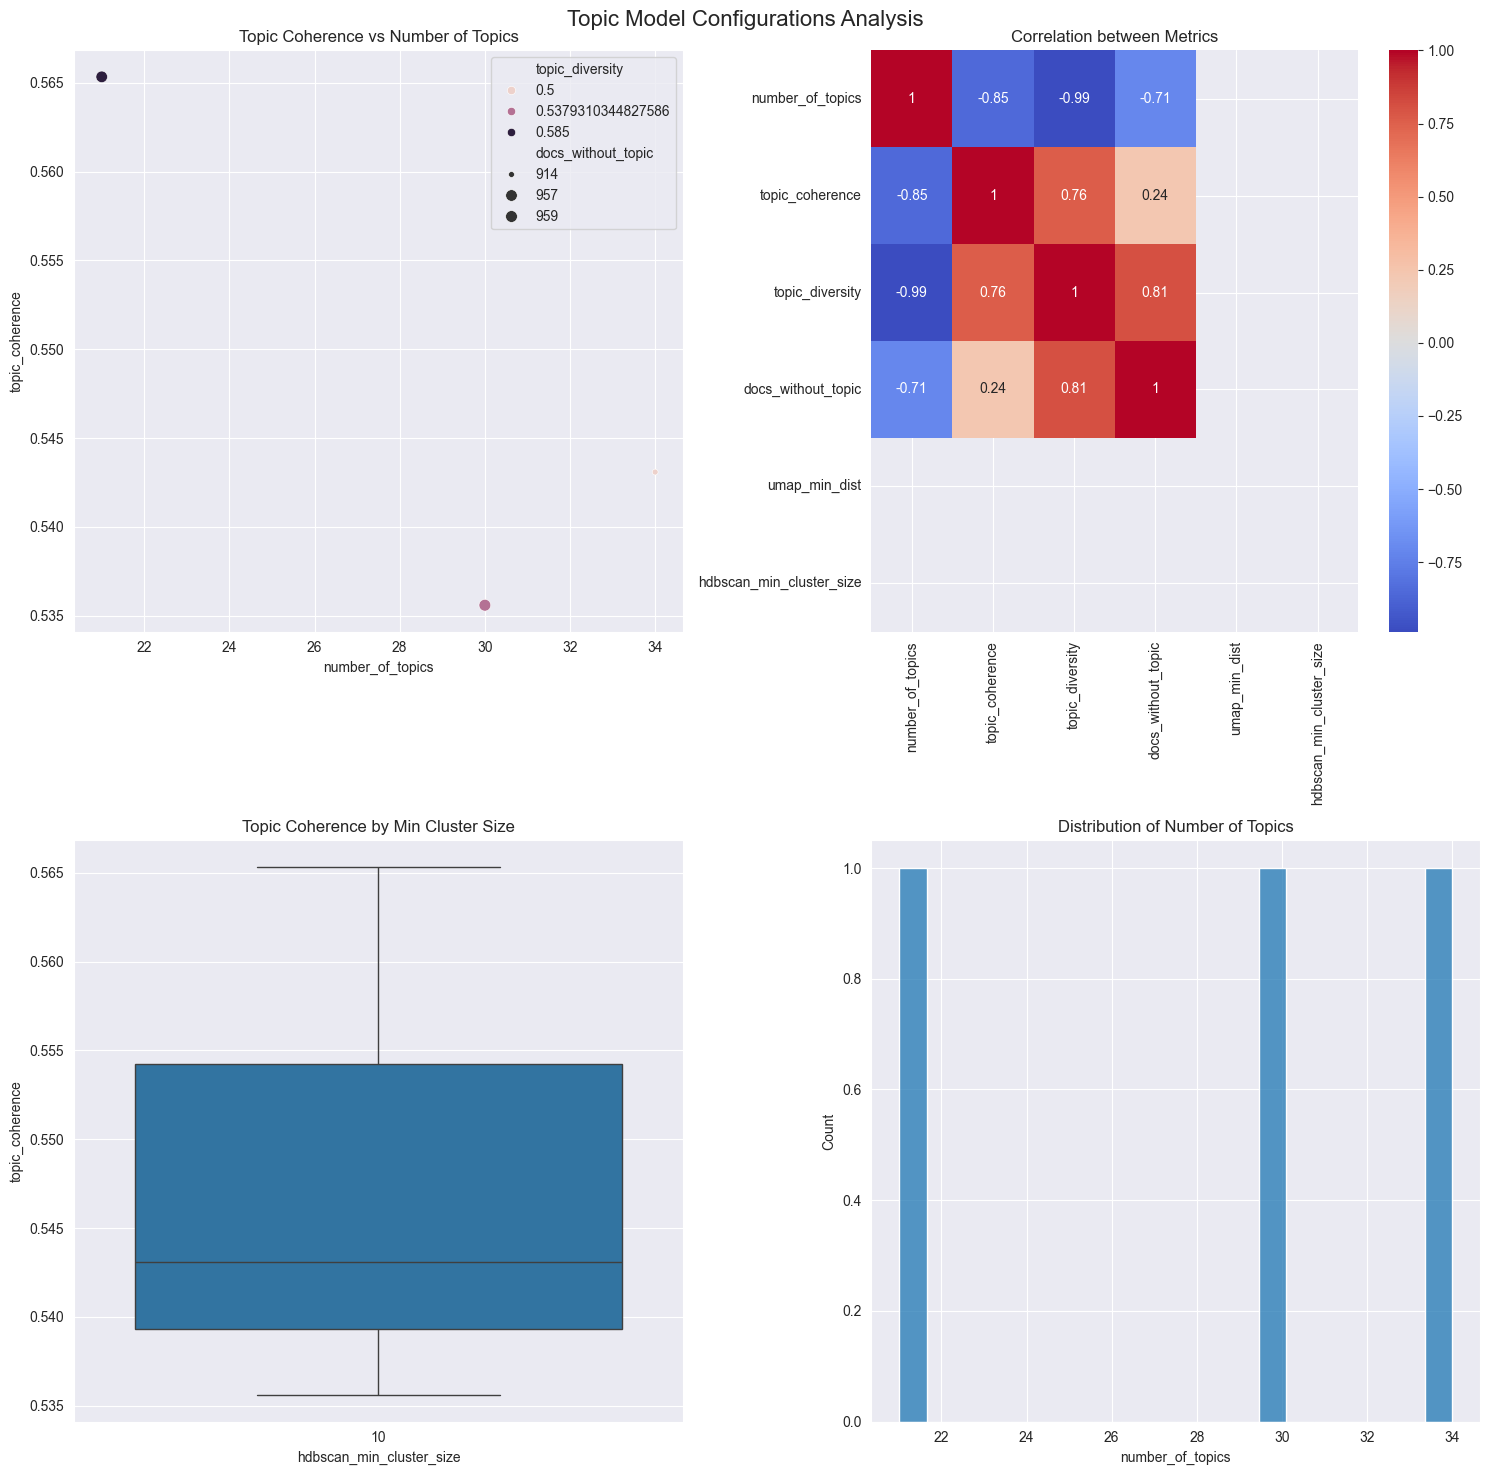

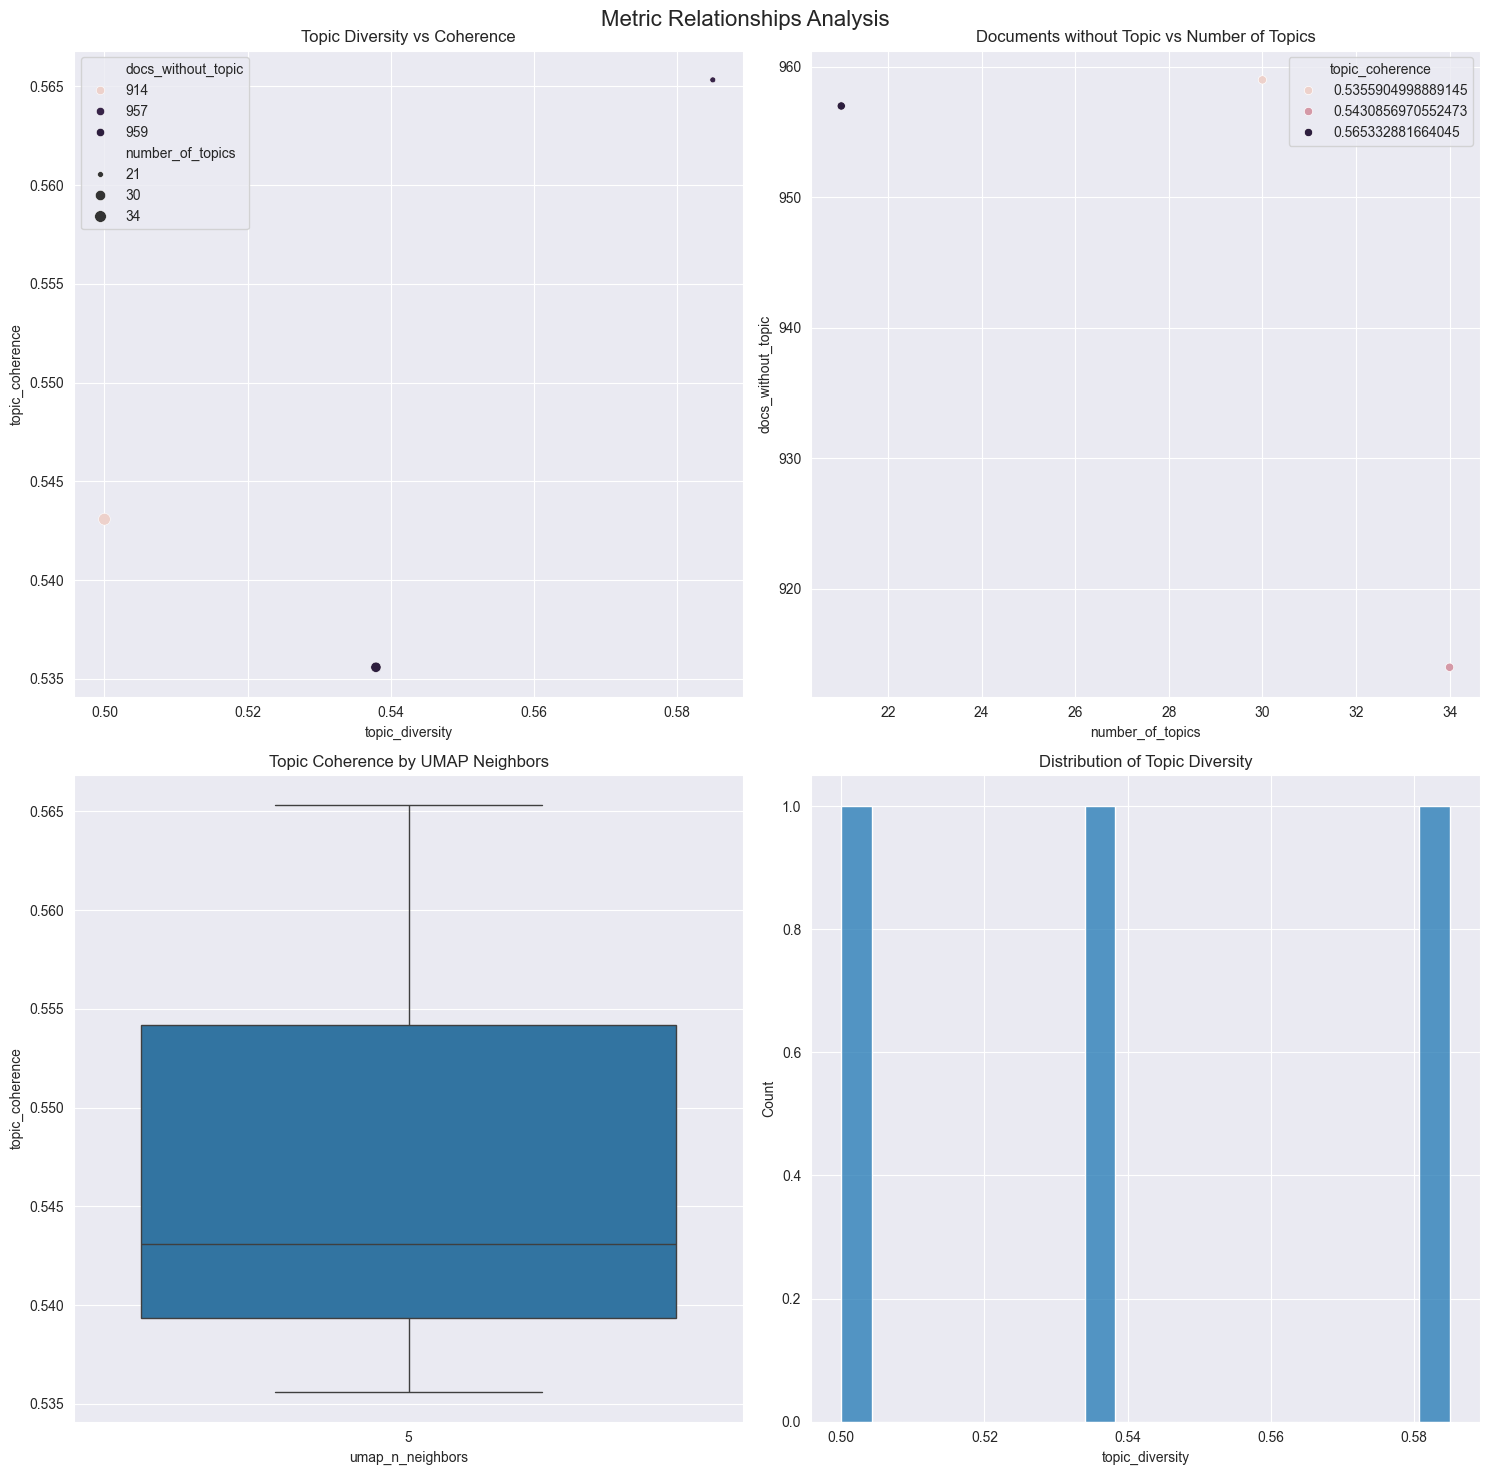

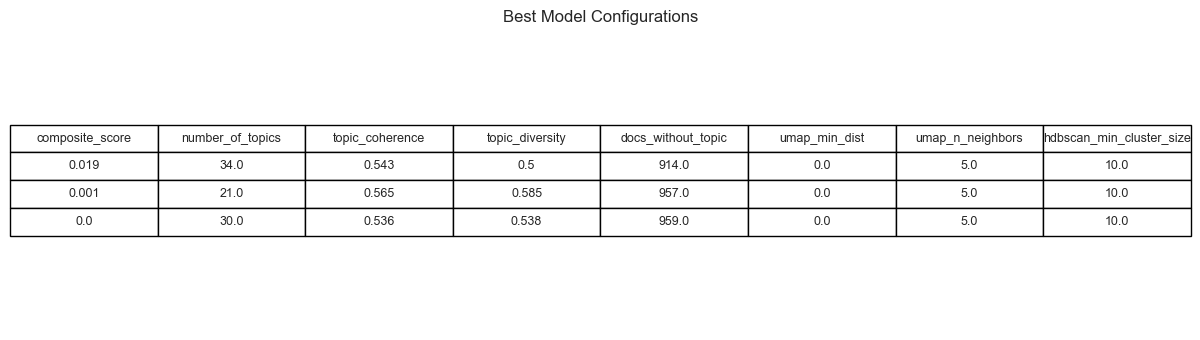

In [7]:
def plot_results_2d(results_df):
    """Create 2D visualizations for the hyperparameter tuning results without WebGL dependency."""
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Remove the model and topics columns for plotting
    plot_df = results_df.drop(['model', 'topics', 'probs'], axis=1)
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    fig.suptitle('Topic Model Configurations Analysis', fontsize=16)
    
    # 1. Scatter plot: Topic Coherence vs Number of Topics
    sns.scatterplot(
        data=plot_df,
        x='number_of_topics',
        y='topic_coherence',
        size='docs_without_topic',
        hue='topic_diversity',
        ax=axes[0,0]
    )
    axes[0,0].set_title('Topic Coherence vs Number of Topics')
    
    # 2. Heatmap of correlation between numeric parameters
    numeric_cols = ['number_of_topics', 'topic_coherence', 'topic_diversity', 
                   'docs_without_topic', 'umap_min_dist', 'hdbscan_min_cluster_size']
    correlation = plot_df[numeric_cols].corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', ax=axes[0,1])
    axes[0,1].set_title('Correlation between Metrics')
    
    # 3. Box plots for key metrics across different HDBSCAN settings
    sns.boxplot(
        data=plot_df,
        x='hdbscan_min_cluster_size',
        y='topic_coherence',
        ax=axes[1,0]
    )
    axes[1,0].set_title('Topic Coherence by Min Cluster Size')
    
    # 4. Distribution of number of topics
    sns.histplot(
        data=plot_df,
        x='number_of_topics',
        bins=20,
        ax=axes[1,1]
    )
    axes[1,1].set_title('Distribution of Number of Topics')
    
    plt.tight_layout()
    return fig

def plot_metric_relationships(results_df):
    """Create additional 2D plots focusing on relationships between metrics."""
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Remove the model and topics columns for plotting
    plot_df = results_df.drop(['model', 'topics', 'probs'], axis=1)
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    fig.suptitle('Metric Relationships Analysis', fontsize=16)
    
    # 1. Topic Diversity vs Topic Coherence
    sns.scatterplot(
        data=plot_df,
        x='topic_diversity',
        y='topic_coherence',
        size='number_of_topics',
        hue='docs_without_topic',
        ax=axes[0,0]
    )
    axes[0,0].set_title('Topic Diversity vs Coherence')
    
    # 2. Documents without topic vs Number of topics
    sns.scatterplot(
        data=plot_df,
        x='number_of_topics',
        y='docs_without_topic',
        hue='topic_coherence',
        ax=axes[0,1]
    )
    axes[0,1].set_title('Documents without Topic vs Number of Topics')
    
    # 3. UMAP parameters effect
    sns.boxplot(
        data=plot_df,
        x='umap_n_neighbors',
        y='topic_coherence',
        ax=axes[1,0]
    )
    axes[1,0].set_title('Topic Coherence by UMAP Neighbors')
    
    # 4. Topic diversity distribution
    sns.histplot(
        data=plot_df,
        x='topic_diversity',
        bins=20,
        ax=axes[1,1]
    )
    axes[1,1].set_title('Distribution of Topic Diversity')
    
    plt.tight_layout()
    return fig

def create_summary_table(results_df, n_best=5):
    """Create a formatted summary table of the best configurations."""
    best_models = find_best_models(results_df, n_best)
    
    summary_df = best_models[[
        'composite_score',
        'number_of_topics',
        'topic_coherence',
        'topic_diversity',
        'docs_without_topic',
        'umap_min_dist',
        'umap_n_neighbors',
        'hdbscan_min_cluster_size'
    ]].round(3)
    
    # Create a more readable table format
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize=(12, n_best/2 + 1))
    ax.axis('tight')
    ax.axis('off')
    
    table = ax.table(
        cellText=summary_df.values,
        colLabels=summary_df.columns,
        cellLoc='center',
        loc='center'
    )
    
    # Adjust table properties
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 1.5)
    
    plt.title('Best Model Configurations')
    plt.tight_layout()
    
    return fig

# Example usage:
# results_df = run_hyperparameter_tuning(df_news, max_combinations=50)
# 
# # Create main visualization plots
fig1 = plot_results_2d(results_df)
fig2 = plot_metric_relationships(results_df)
# 
# # Create summary table
fig3 = create_summary_table(results_df)
# 
# # Show all plots
plt.show()